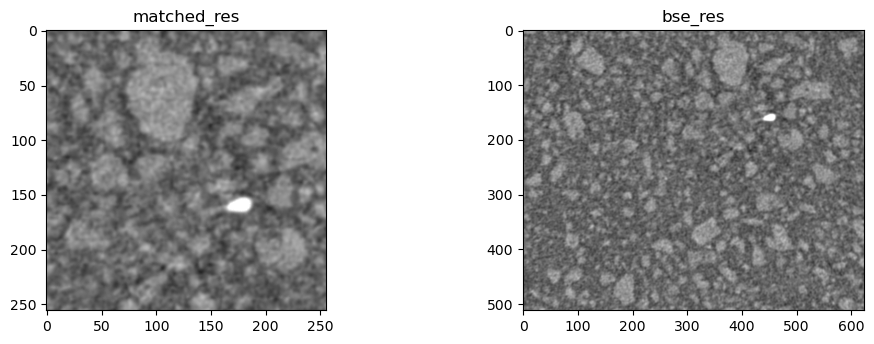

In [11]:
# 图像配准Step1，后面再给它整合到一个类中
import cv2
import numpy as np
import matplotlib.pyplot as plt
from image_enhanced.image_preprocess import ImageProcess
from utils.tools import Tools
from utils.visualize import VisualizeData

config = Tools.load_yaml_config("matched_config_test.yaml")

# HACK 要将256对应的图像映射到BSE图像中的坐标，再把BSE图像中的坐标点再映射到原始CT图像中

# 将裁剪矩形的坐标重新映射到原始CT中
# 测试一下：
# (1) 先进行旋转
# (2) 截取哪一部分的图像
ct_size = (1920, 1920)
crop_from_origin_delta_x = (ct_size[0] - config.origin_ct_size[0]) * 0.5
crop_from_origin_delta_y = (ct_size[1] - config.origin_ct_size[1]) * 0.5
# 映射到未下采样时的裁剪坐标点
pos_in_origin_crop = np.array(config.matched_translate) * config.downsample_times
# 映射到原始CT图像中的裁剪坐标点
crop_ground_ct_pos = pos_in_origin_crop + [crop_from_origin_delta_x, crop_from_origin_delta_y]

ct_img = Tools.get_ct_img(config.cement_sample_index, config.matched_slice_index)

# 匹配图像剪切
matched_cropped_rect = [crop_ground_ct_pos[0], 
                crop_ground_ct_pos[1],
                config.origin_matched_size[0],
                config.origin_matched_size[1],
                ]

# 匹配的BSE图像的剪切
matched_bse_rect = [
    crop_ground_ct_pos[0] - config.bse_cropped_offset[0] + config.origin_matched_size[0] * 0.5,
    crop_ground_ct_pos[1] - config.bse_cropped_offset[1] + config.origin_matched_size[1] * 0.5,
    config.bse_roi_size[0],
    config.bse_roi_size[1]
]

cropped_matched_res = Tools.crop_rotate_mi(ct_img, 
                                   [ct_size[0] * 0.5, ct_size[0] * 0.5],
                                   ct_size,
                                   config.matched_rotation,
                                   matched_cropped_rect
                                   )
cropped_bse_res = Tools.crop_rotate_mi(ct_img, 
                                   [ct_size[0] * 0.5, ct_size[0] * 0.5],
                                   ct_size,
                                   config.matched_rotation,
                                   matched_bse_rect
                                   )

VisualizeData.show_imgs([cropped_matched_res, cropped_bse_res], ["matched_res", "bse_res"])